**Objective:**

Our primary objective is to identify correlations between various fields, such as whether a high-budget movie leads to increased revenue.

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [8]:
from google.colab import files
uploaded = files.upload()


Saving movies.csv to movies.csv


In [9]:
# Read the data

df = pd.read_csv('movies.csv')


In [10]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime(min)
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
# Cleaning the data

# Checking for missing values

df.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [13]:
df.dropna(inplace=True)
# All missinig values removed

In [14]:
# Removing duplicates

df.duplicated().sum()
# No duplicates found

0

In [15]:
# Checking datatypes of every column

df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [16]:
# Changing Budget,Votes & Gross datatype to int64

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


# Datatypes changed

In [17]:
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,int64
director,object
writer,object
star,object


In [18]:
# Sorting the data by gross in descending order

df.sort_values(by=['gross'],inplace = True,ascending = False)

**Hypothesis:**

 1) Budget high correlation

 2) Company high correlation

 3) Rated R movies having low gross

 4) Runtime movies excedding 2.5 hrs having low gross



**Correlation between the budget vs gross**

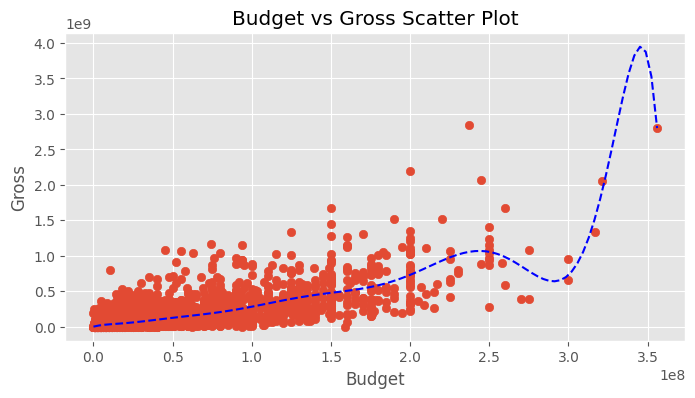

In [21]:

# Setting the figure size
plt.figure(figsize=(8, 4))

# Fit a linear regression line
coefficients = np.polyfit(df['budget'], df['gross'], 10) # 10 is for 10 degree line. if we pass 1, we will have a linear line
polynomial = np.poly1d(coefficients)
trendline_x = np.linspace(min(df['budget']), max(df['budget']), 100)
trendline_y = polynomial(trendline_x)

# Plot a scatter plot
plt.scatter(x = df['budget'] , y = df['gross'])

# Plot the trendline
plt.plot(trendline_x, trendline_y, color='blue', linestyle='--', label='Trendline')

# Label the title, x and y axis
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross Scatter Plot')
plt.show()


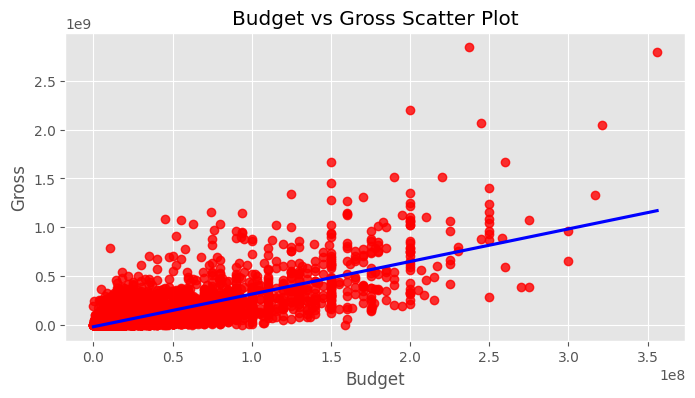

In [22]:
# Same plot above but with differnt method.
plt.figure(figsize = (8,4))
sns.regplot(x= df['budget'], y= df['gross'], color='red', marker='o',line_kws={"color": "blue"}, ci=None)
# ci=None to remove confidence intervals

plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross Scatter Plot')
plt.show()


In [24]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                  year     score     votes    budget     gross  runtime(min)
year          1.000000  0.056386  0.206021  0.327722  0.274321      0.075077
score         0.056386  1.000000  0.474256  0.072001  0.222556      0.414068
votes         0.206021  0.474256  1.000000  0.439675  0.614751      0.352303
budget        0.327722  0.072001  0.439675  1.000000  0.740247      0.318695
gross         0.274321  0.222556  0.614751  0.740247  1.000000      0.275796
runtime(min)  0.075077  0.414068  0.352303  0.318695  0.275796      1.000000


In [26]:
pearson_corr = df['budget'].corr(df['gross'])
print(pearson_corr)
# High correlation between budget and gross which means that my hypothises was right

0.7402465439219625


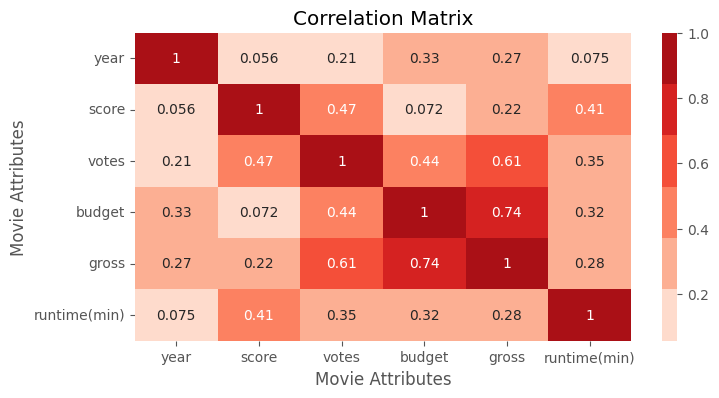

In [28]:
# Visualizing the above table using heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr(method='pearson')
# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette('Reds'))
plt.xlabel('Movie Attributes')
plt.ylabel('Movie Attributes')
plt.title('Correlation Matrix')
plt.show()


**Points to note:**

1) Pearson is suitable for assessing linear relationships between continuous variables.

2) Spearman is suitable when you have non-linear relationships or data that may not meet the assumptions of Pearson.

3) Kendall is suitable for assessing ordinal associations or relationships involving ranked data.

**Checking the correlation between movie rating type and gross**

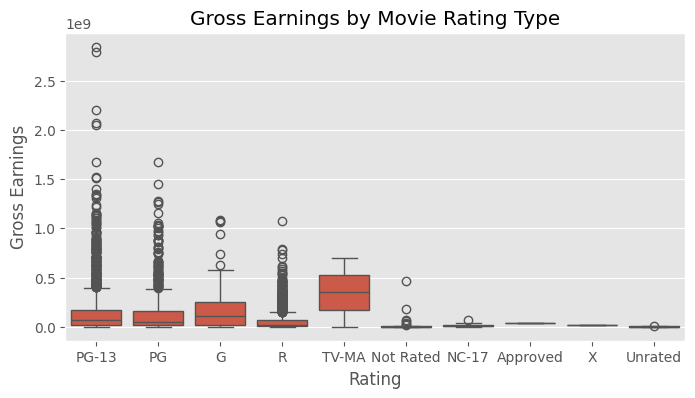

In [29]:
# Create a box plot to compare gross earnings by rating
plt.figure(figsize = (8,4))
sns.boxplot(x='rating', y='gross', data=df)
plt.xlabel('Rating')
plt.ylabel('Gross Earnings')
plt.title('Gross Earnings by Movie Rating Type')
plt.show()

**Points to note:**

 This data suggests that there is a correlation between rating type and gross earnings.Movies with more restrictive ratings have lower gross earnings because they have a smaller audience.For example, R-rated movies can only be seen by people over the age of 17, which limits their potential audience.I belief that R-rated movies have lower gross earnings because not every age person can watch them is correct.This is one of the main factors that contributes to the correlation between rating type and gross earnings.

**Checking the correlaion between runtime(min) and gross**

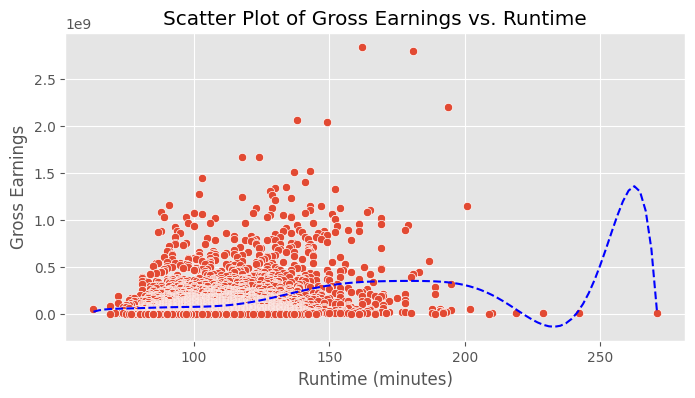

In [30]:
# Create a scatter plot of gross earnings vs. runtime
plt.figure(figsize = (8,4))

coefficients = np.polyfit(df['runtime(min)'], df['gross'], 10) # 10 is for 10 degree line. if we pass 1, we will have a linear line
polynomial = np.poly1d(coefficients)
trendline_x = np.linspace(min(df['runtime(min)']), max(df['runtime(min)']), 100)
trendline_y = polynomial(trendline_x)

sns.scatterplot(x='runtime(min)', y='gross', data=df)

plt.plot(trendline_x, trendline_y, color='blue', linestyle='--', label='Trendline')

plt.xlabel('Runtime (minutes)')
plt.ylabel('Gross Earnings')
plt.title('Scatter Plot of Gross Earnings vs. Runtime')
plt.show()


**Points to note:**

The scatter plot of gross earnings vs. runtime shows the relationship between the gross earnings and the runtime of a movie.Each point on the scatter plot represents a single movie.The x-axis of the scatter plot shows the runtime of the movie in minutes, and the y-axis shows the gross earnings of the movie in billions of dollars.

The overall trend of the scatter plot is that movies with longer runtimes tend to have lower gross earnings.This is likely because audiences are less likely to see a movie that is longer than two hours.Additionally, longer movies may be more expensive to produce and market, which can reduce their profitability.

However, there are also a number of movies with longer runtimes that have had very high gross earnings.For example, the movie "Avatar" has a runtime of 162 minutes and grossed over $2.9 billion worldwide.This suggests that while runtime is a factor that can affect gross earnings, it is not the only factor.Other factors such as the genre of the movie, the star power of the cast, and the marketing campaign can also play a role.

**Conclusion:**

Concluding this project, we can affirm that two out of the three hypotheses we formulated regarding the data have been validated. The hypothesis concerning the relationship between runtime and gross earnings holds true to a certain degree.Furthermore, we have uncovered notable correlations within the data, including the relationship between gross earnings and budget, as well as between movie rating and gross earnings.